In [ ]:
#HW_1307

In [2]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pa
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

1) Time series analysis. air-passenger-data

<AxesSubplot: >

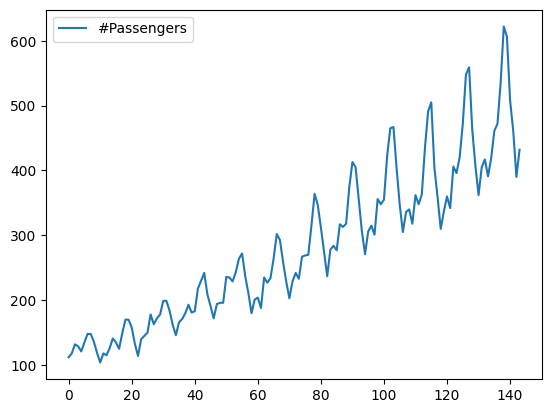

In [3]:
# Plot time series 
air_passengers_data = pa.read_csv("AirPassengers.csv")

air_passengers_data.plot()

Conclusion from the plot: the time series has trend and seasonality

<StemContainer object of 3 artists>

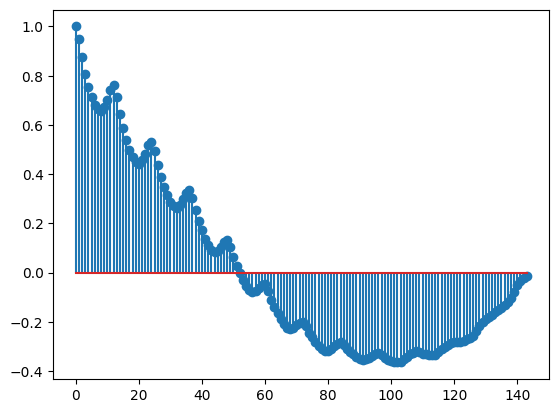

In [4]:
# ACF function
data = air_passengers_data["#Passengers"]
acf = sm.tsa.stattools.acf(data,nlags=150)
plot.stem(range(0,len(acf)),acf)

<AxesSubplot: >

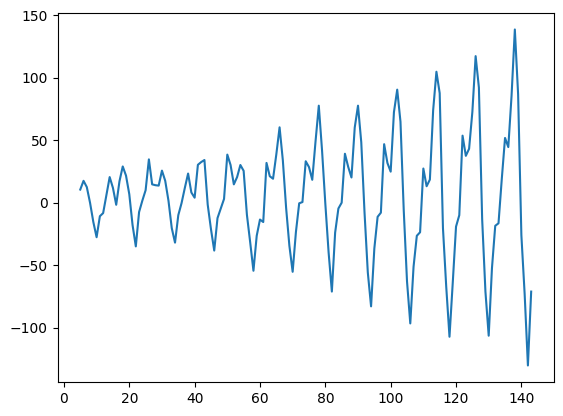

In [10]:
# remove trend
rolling_mean = data.rolling(window=6).mean()
data_no_trend = data - rolling_mean #remove trend
data_no_trend.plot()

<StemContainer object of 3 artists>

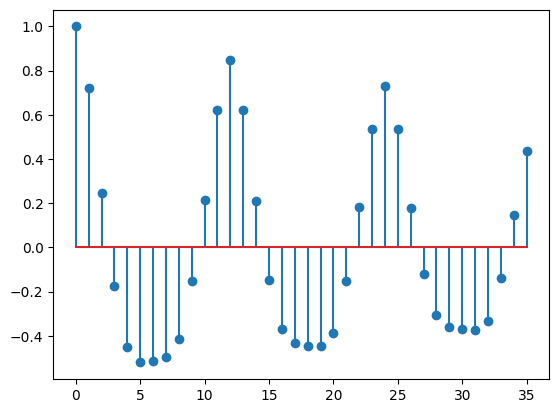

In [6]:
# ACF without trend
data_no_trend = data_no_trend[data_no_trend.notnull()]
acf = sm.tsa.stattools.acf(data_no_trend,nlags=35)
plot.stem(range(0,len(acf)),acf)

<AxesSubplot: >

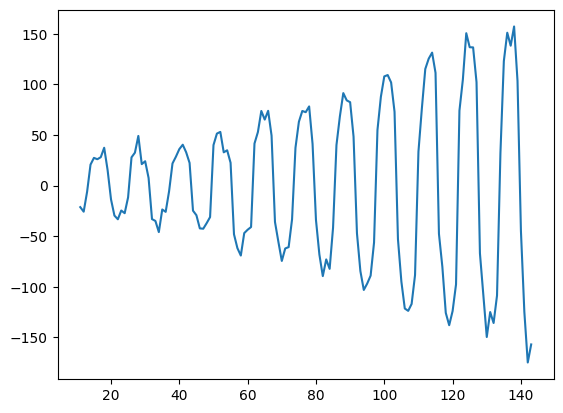

In [8]:
# remove seasonality
data_cleared = data_no_trend.diff(periods=6)
data_cleared = data_cleared[data_cleared.notnull()]
data_cleared.plot()

<StemContainer object of 3 artists>

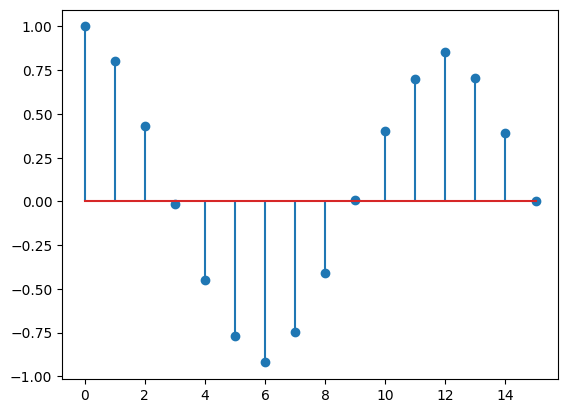

In [11]:
# ACF without seasonality
acf = sm.tsa.stattools.acf(data_cleared,nlags=15)
plot.stem(range(0,len(acf)),acf)

In [12]:
test_results = adfuller(data_cleared)
print('ADF Statistic: ', test_results[0])
print('P-Value: ', test_results[1])

ADF Statistic:  -7.066905784185542
P-Value:  5.053017949760885e-10


P-value is small - H0 hypoteses can be declined, the model is stationary. 

<StemContainer object of 3 artists>

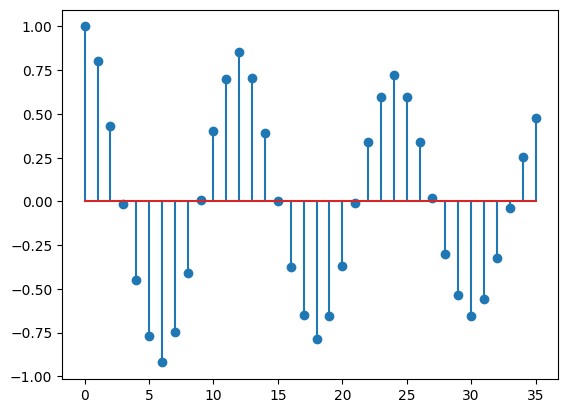

In [13]:
acf = sm.tsa.stattools.acf(data_cleared,nlags=35)
plot.stem(range(0,len(acf)),acf)

In [14]:
model = auto_arima(data_cleared,trace=True,suppress_warnings=True)
results = model.fit(data_cleared)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1197.907, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1540.196, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1396.848, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1538.203, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1198.999, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1366.188, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1196.078, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(

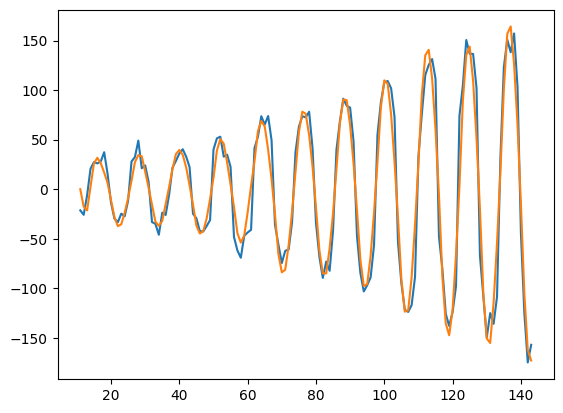

In [15]:
plot.plot(data_cleared)
plot.plot(results.fittedvalues())

In [ ]:
#plot.plot(auto_arima_results.predict(24))
#auto_arima_results.predict(24)

In [16]:
model = auto_arima(data,trace=True,suppress_warnings=True)
results = model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

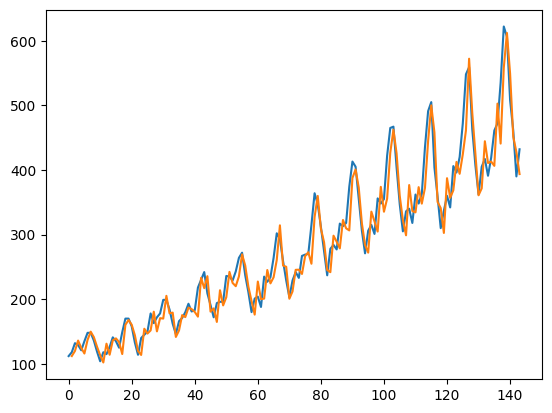

In [17]:
plot.plot(data)
fitted_vals = results.fittedvalues()
fitted_vals = fitted_vals[1:]
plot.plot(fitted_vals)

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Wed, 19 Jul 2023   AIC                           1365.825
Time:                        20:18:32   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1729     85.616      8.458      0.000     556.369     891.977
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

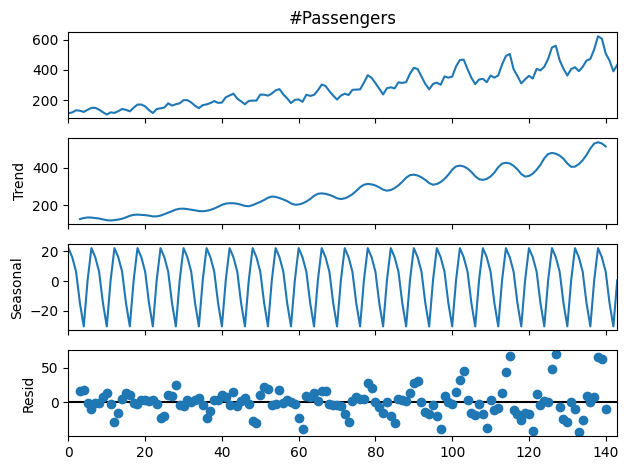

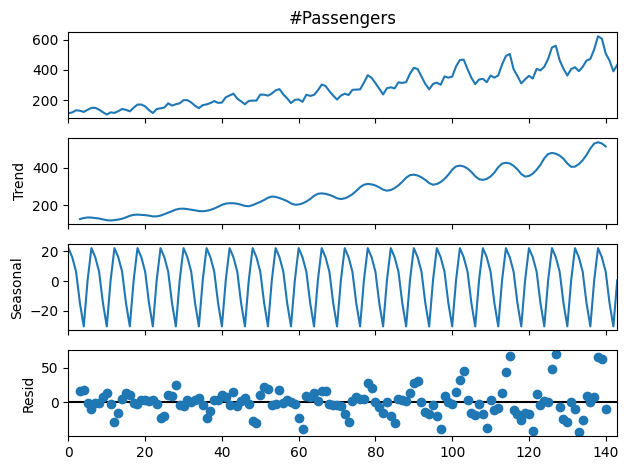

In [21]:
decomoposition = seasonal_decompose(data,period=6)
decomoposition.plot()

2) Daily climate time series data, https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

<AxesSubplot: >

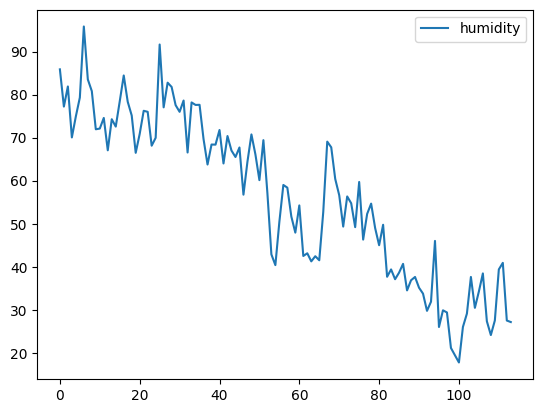

In [22]:
# Plot time series (give visual feedback) 
climate_test = pa.read_csv("climate_test.csv", usecols=['humidity'])

climate_test.plot()

In [23]:
climate_test

,humidity
0,85.869565
1,77.222222
2,81.888889
3,70.050000
4,74.944444
...,...
109,27.500000
110,39.375000
111,40.900000
112,27.500000


<StemContainer object of 3 artists>

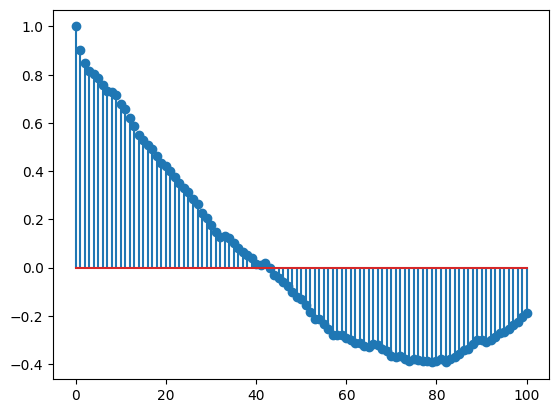

In [27]:
# Calculate and plot ACF 
data = climate_test["humidity"]
acf = sm.tsa.stattools.acf(data,nlags=100)
plot.stem(range(0,len(acf)),acf)

In [28]:
# Augmented Dickey-Fuller (ADF) test
test_results = adfuller(data_cleared)
print('ADF Statistic: ', test_results[0])
print('P-Value: ', test_results[1])

ADF Statistic:  -7.066905784185542
P-Value:  5.053017949760885e-10


P-value is small - H0 hypoteses can be declined. The model is stationary. 

<AxesSubplot: >

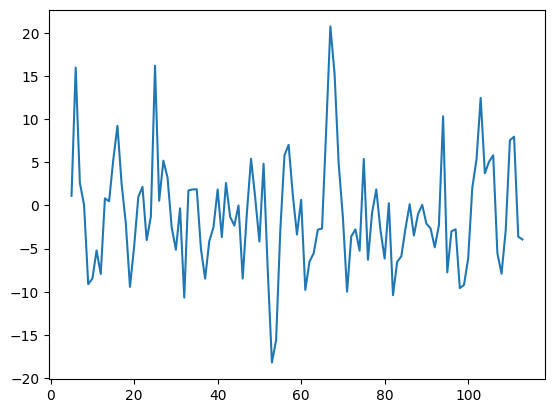

In [32]:
# trend - remove
rolling_mean = data.rolling(window=6).mean()
data_no_trend = data - rolling_mean #remove trend
data_no_trend.plot()

<StemContainer object of 3 artists>

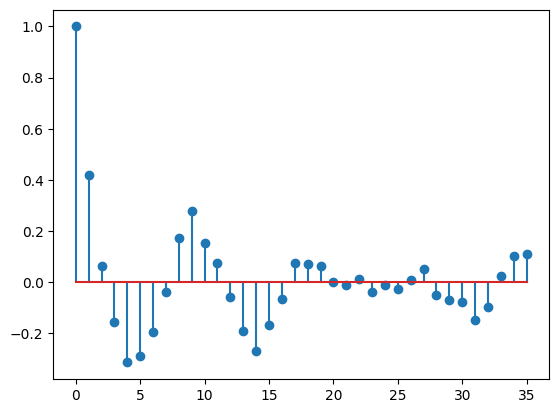

In [33]:
# ACF without trend
data_no_trend = data_no_trend[data_no_trend.notnull()]
acf = sm.tsa.stattools.acf(data_no_trend,nlags=35)
plot.stem(range(0,len(acf)),acf)

<AxesSubplot: >

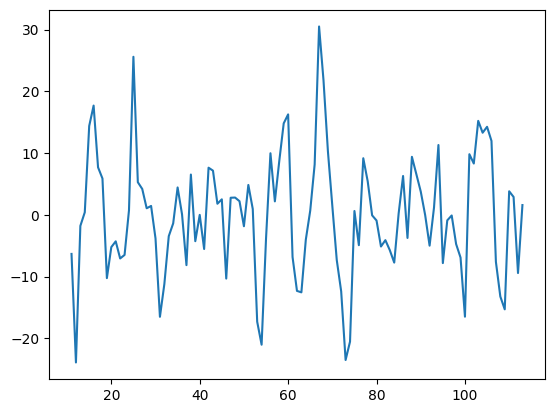

In [34]:
# remove seasonality 
data_cleared = data_no_trend.diff(periods=6)
data_cleared = data_cleared[data_cleared.notnull()]
data_cleared.plot()

<StemContainer object of 3 artists>

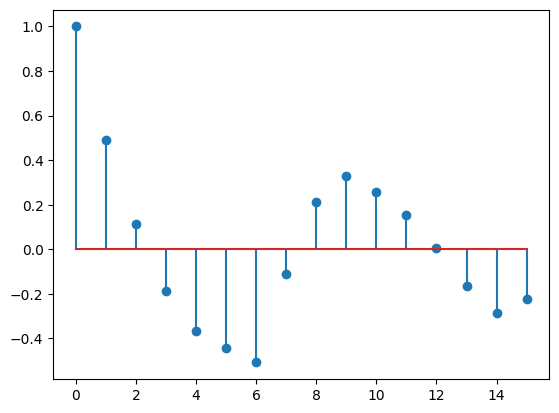

In [35]:
# ACF without seasonality 
acf = sm.tsa.stattools.acf(data_cleared,nlags=15)
plot.stem(range(0,len(acf)),acf)

In [36]:
# ARIMA model 
model = auto_arima(data_cleared,trace=True,suppress_warnings=True)
results = model.fit(data_cleared)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=769.041, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=742.666, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=744.610, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=767.043, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=741.843, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=737.713, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=734.794, Time=0.06 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=730.554, Time=0.11 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=726.982, Time=0.14 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=727.854, Time=0.15 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=725.037, Time=0.09 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=725.907, Time=0.1

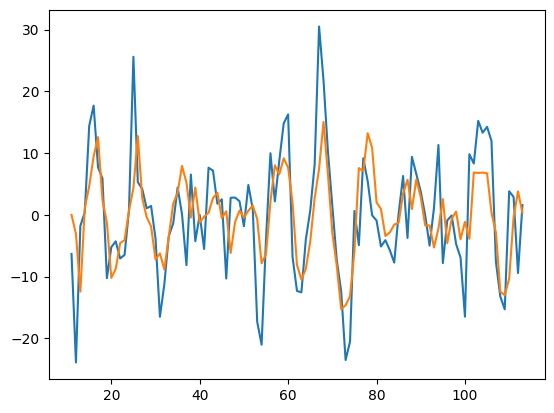

In [37]:
plot.plot(data_cleared)
plot.plot(results.fittedvalues())

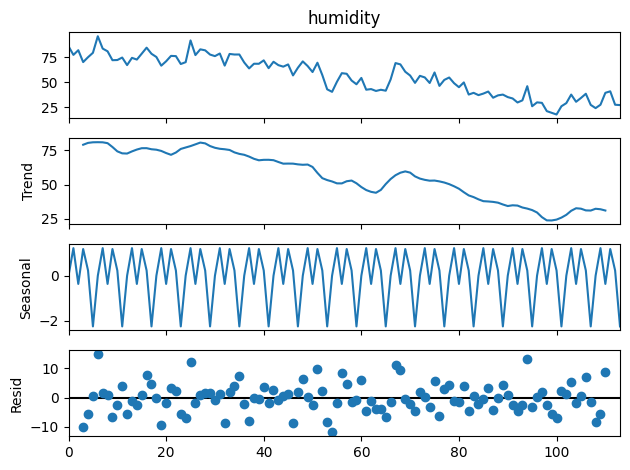

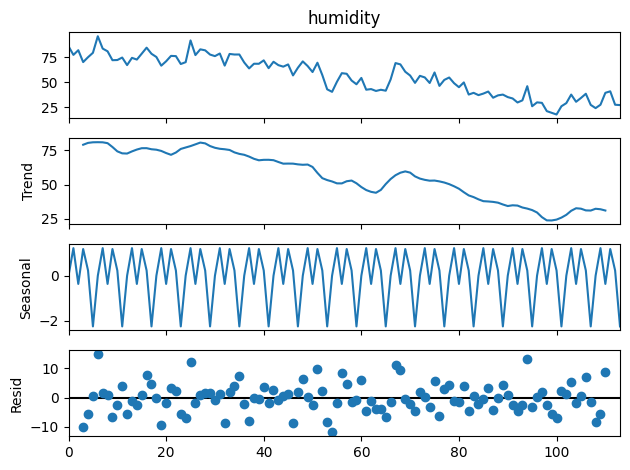

In [38]:
decomoposition = seasonal_decompose(data,period=6)
decomoposition.plot()

In [39]:
model = auto_arima(data,trace=True,suppress_warnings=True)
results = model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=777.729, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=772.806, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=767.723, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=776.282, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=761.190, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=760.866, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=764.383, Time=0.06 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 2.738 seconds


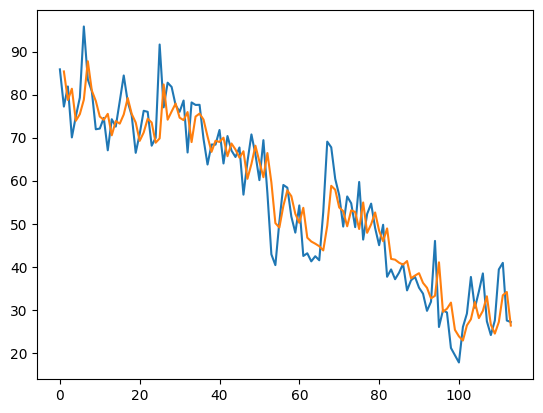

In [40]:
plot.plot(data)
fitted_vals = results.fittedvalues()
fitted_vals = fitted_vals[1:]
plot.plot(fitted_vals)

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:               SARIMAX(0, 1, 3)   Log Likelihood                -375.433
Date:                Wed, 19 Jul 2023   AIC                            760.866
Time:                        13:46:13   BIC                            774.503
Sample:                             0   HQIC                           766.400
                                - 114                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4837      0.141     -3.438      0.001      -0.760      -0.208
ma.L1         -0.4334      0.095     -4.548      0.000      -0.620      -0.247
ma.L2         -0.2064      0.110     -1.870      0.062      -0.423       0.010
ma.L3         -0.1644      0.097     -1.699      0.089      -0.354       0.025
sigma2        44.6747      5.509      8.109      0.000      33.877      55.472
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.82
Prob(Q):                              0.89   Prob(JB):                         0.05
Heteroskedasticity (H):               0.88   Skew:                             0.43
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""